In [63]:
import pandas as pd
from edgar import edgar_cleaner as ec
from edgar import edgar_downloader as ed
from edgar import ref_data
from edgar import edgar_sentiment_wordcount as esw

In [64]:
df = pd.read_csv(r'C:\Users\alexs\OneDrive - Kubrick Group\Python\Edgar Project\flapjack-edgar\edgar\df_sent.csv')

In [65]:
df['neg_ratio']=(df['Negative']/(df['Negative']+df['Positive']+df['Uncertainty']+df['Litigious']+df['Strong_Modal']+df['Weak_Modal']+df['Constraining']+df['Complexity']))
df['pos_ratio']=(df['Positive']/(df['Negative']+df['Positive']+df['Uncertainty']+df['Litigious']+df['Strong_Modal']+df['Weak_Modal']+df['Constraining']+df['Complexity']))

In [66]:
df

Unnamed: 0  index Symbol ReportType  FilingDate  Negative  Positive  \
0             0      0   AAPL        10k  2011-10-26       173        51   
1             1      0   AAPL        10k  2012-10-31       177        53   
2             2      0   AAPL        10k  2013-10-30       185        49   
3             3      0   AAPL        10k  2014-10-27       178        51   
4             4      0   AAPL        10k  2015-10-28       171        50   
..          ...    ...    ...        ...         ...       ...       ...   
699         700      0    XOM        10k  2017-02-22       141        53   
700         701      0    XOM        10k  2018-02-28       141        56   
701         702      0    XOM        10k  2019-02-27       152        56   
702         703      0    XOM        10k  2020-02-26       161        63   
703         704      0    XOM        10k  2021-02-24       172        68   

     Uncertainty  Litigious  Strong_Modal  Weak_Modal  Constraining  \
0             70         70             5          12            37   
1             68         67             5          11            36   
2             70         70             5          11            38   
3             68         69             5          11            37   
4             68         69             5          11            37   
..           ...        ...           ...         ...           ...   
699           62         61             4          12            39   
700           63         65             4          13            38   
701           62         61             3          12            39   
702           67         66             6          13            42   
703           61         63             6          12            42   

     Complexity  neg_ratio  pos_ratio  
0            79   0.348089   0.102616  
1            78   0.357576   0.107071  
2            82   0.362745   0.096078  
3            81   0.356000   0.102000  
4            83   0.346154   0.101215  
..          ...        ...        ...  
699          65   0.322654   0.121281  
700          66   0.316143   0.125561  
701          71   0.333333   0.122807  
702          75   0.326572   0.127789  
703          76   0.344000   0.136000  

[704 rows x 15 columns]

In [67]:
df1 = df[['Symbol', 'FilingDate','Negative', 'neg_ratio']]
df1['neg_ratio'] = pd.to_numeric(df1['neg_ratio'], errors = 'coerce')
df1

<ipython-input-67-d420bca56f22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['neg_ratio'] = pd.to_numeric(df1['neg_ratio'], errors = 'coerce')


Symbol  FilingDate  Negative  neg_ratio
0     AAPL  2011-10-26       173   0.348089
1     AAPL  2012-10-31       177   0.357576
2     AAPL  2013-10-30       185   0.362745
3     AAPL  2014-10-27       178   0.356000
4     AAPL  2015-10-28       171   0.346154
..     ...         ...       ...        ...
699    XOM  2017-02-22       141   0.322654
700    XOM  2018-02-28       141   0.316143
701    XOM  2019-02-27       152   0.333333
702    XOM  2020-02-26       161   0.326572
703    XOM  2021-02-24       172   0.344000

[704 rows x 4 columns]

In [68]:
df2 = df1.groupby(['Symbol']).mean()
df2

Negative  neg_ratio
Symbol                       
AAPL    176.900000   0.360421
ABBV    221.000000   0.352247
ABT     164.166667   0.341189
ACN     238.500000   0.381557
ADBE    239.777778   0.368530
...            ...        ...
VZ      127.500000   0.298177
WBA     265.142857   0.397044
WFC      27.500000   0.285156
WMT     195.400000   0.361873
XOM     150.000000   0.324977

[101 rows x 2 columns]

In [69]:
df2[df2['neg_ratio']>0.4]

Negative  neg_ratio
Symbol                       
AXP     316.375000   0.417780
BAC     358.000000   0.441430
C       356.000000   0.409195
COF     304.833333   0.401698
EXC     344.500000   0.404467
FB      240.000000   0.401378
GS      352.000000   0.406467
JPM     431.000000   0.449896
MET     386.666667   0.400006
MS      321.000000   0.402256
PYPL    299.000000   0.407460

In [8]:
#ref_data.get_yahoo_data('2011-10-26','2020-10-30',['BAC'])

In [70]:
df_yh = ref_data.get_yahoo_data('2011-10-26','2020-10-30',['AXP']) #AXP/PYPL chosen from list above
df_yh['FilingDate'] = df_yh['date']
df_yh = df_yh[['FilingDate', 'adjclose','1_daily_return', '10_daily_return']]
df_yh

FilingDate   adjclose  1_daily_return  10_daily_return
0     2011-10-26  43.652157       -0.030926         0.025198
1     2011-10-27  45.045231       -0.000768         0.060501
2     2011-10-28  45.079834        0.029237         0.034346
3     2011-10-31  43.799263        0.033273         0.023661
4     2011-11-01  42.388878       -0.026431        -0.019220
...          ...        ...             ...              ...
2264  2020-10-26  95.763611        0.020541        -0.174576
2265  2020-10-27  93.836090        0.036354        -0.181285
2266  2020-10-28  90.544456        0.005820        -0.175666
2267  2020-10-29  90.020569       -0.001863        -0.180288
2268  2020-10-30  90.188599       -0.023126        -0.206540

[2269 rows x 4 columns]

In [71]:
dfa = df[df['Symbol']=='AXP'] #AXP/PYPL
dfb = dfa[['Symbol','FilingDate', 'neg_ratio']]
dfb

Symbol  FilingDate  neg_ratio
72    AXP  2014-02-25   0.401114
73    AXP  2015-02-24   0.408392
74    AXP  2016-02-19   0.415553
75    AXP  2017-02-17   0.416887
76    AXP  2018-02-16   0.419060
77    AXP  2019-02-13   0.424731
78    AXP  2020-02-13   0.430481
79    AXP  2021-02-12   0.426020

In [72]:
df_yh['FilingDate'] = pd.to_datetime(df_yh['FilingDate'])
dfb['FilingDate'] = pd.to_datetime(dfb['FilingDate'])

<ipython-input-72-506280923691>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['FilingDate'] = pd.to_datetime(dfb['FilingDate'])


In [73]:
df_mg = pd.merge(dfb, df_yh)
df_mg

Symbol FilingDate  neg_ratio    adjclose  1_daily_return  10_daily_return
0    AXP 2014-02-25   0.401114   80.098656        0.002006        -0.035300
1    AXP 2015-02-24   0.408392   72.846954       -0.015942         0.022121
2    AXP 2016-02-19   0.415553   50.044075       -0.016538        -0.061417
3    AXP 2017-02-17   0.416887   74.319908       -0.003251         0.002641
4    AXP 2018-02-16   0.419060   91.630798       -0.004116         0.001345
5    AXP 2019-02-13   0.424731  103.367477        0.008816        -0.001671
6    AXP 2020-02-13   0.430481  131.032043       -0.010377         0.223142

In [74]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'AXP - American Express Company'}, xlabel='FilingDate'>

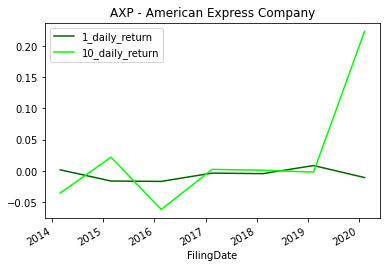

In [75]:
df_mg.plot(x = 'FilingDate', y = ['1_daily_return','10_daily_return'], color = ['darkgreen', 'lime'], kind = 'line', title = 'AXP - American Express Company') # COF

<AxesSubplot:title={'center':'PYPL - Paypal Holdings Inc'}, xlabel='FilingDate'>

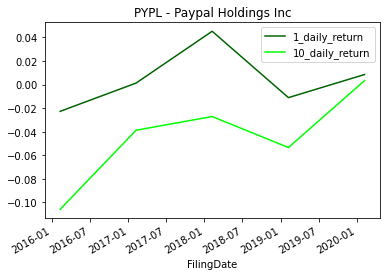

In [57]:
df_mg.plot(x = 'FilingDate', y = ['1_daily_return','10_daily_return'], color = ['darkgreen', 'lime'], kind = 'line', title = 'PYPL - Paypal Holdings Inc')